# Modelo RandomForestRegressor

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler


In [2]:
#### Loadin data

In [3]:
data = pd.read_csv("../data/diamonds_train.csv")

In [4]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z', 
             'price']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,505
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,738
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,4882


In [5]:
data["size"] = data["x"] * data["y"] * data["z"]
data

,carat,cut,color,clarity,depth,table,x,y,z,price,size
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,4268,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,505,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,2686,113.436890
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,738,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,4882,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,7.10,7.04,4.43,10070,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,8.31,8.25,4.73,12615,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,6.37,6.42,4.01,5457,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,4.45,4.47,2.76,456,54.900540


In [6]:
#data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'size']]
#data.head()
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   size     40455 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.5+ MB


In [8]:
# Columnas categóricas
cat_col = ['cut', 'clarity', 'color']

# Inicializar LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas
for col in cat_col:
    data[col] = le.fit_transform(data[col])

# Información del DataFrame después de la codificación
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  int64  
 2   color    40455 non-null  int64  
 3   clarity  40455 non-null  int64  
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
 10  size     40455 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.4 MB


In [9]:
'''
cut_new = {
    "Fair" : 10,
    "Good" : 20,
    "Very Good" : 30,
    "Premium" : 40,
    "Ideal" : 50,
}
data['cut'].replace(cut_new,inplace=True)

color_new = {
    "D" : 700,
    "E" : 600,
    "F" : 500,
    "G" : 400,
    "H" : 300,
    "I" : 200,
    "J" : 100,
}
data['color'].replace(color_new,inplace=True)

new_clarity = { "I1" : 1000,
    "SI2" : 2000,
    "SI1" : 3000,
    "VS2" : 4000,
    "VS1" : 5000,
    "VVS2" : 6000,
    "VVS1" : 7000,
    "IF" : 8000,}
data['clarity'].replace(new_clarity,inplace=True)'''

'\ncut_new = {\n    "Fair" : 10,\n    "Good" : 20,\n    "Very Good" : 30,\n    "Premium" : 40,\n    "Ideal" : 50,\n}\ndata[\'cut\'].replace(cut_new,inplace=True)\n\ncolor_new = {\n    "D" : 700,\n    "E" : 600,\n    "F" : 500,\n    "G" : 400,\n    "H" : 300,\n    "I" : 200,\n    "J" : 100,\n}\ndata[\'color\'].replace(color_new,inplace=True)\n\nnew_clarity = { "I1" : 1000,\n    "SI2" : 2000,\n    "SI1" : 3000,\n    "VS2" : 4000,\n    "VS1" : 5000,\n    "VVS2" : 6000,\n    "VVS1" : 7000,\n    "IF" : 8000,}\ndata[\'clarity\'].replace(new_clarity,inplace=True)'

In [10]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price,size
0,1.21,3,6,5,62.4,58.0,6.83,6.79,4.25,4268,197.096725
1,0.32,4,4,5,63.0,57.0,4.35,4.38,2.75,505,52.395750
2,0.71,0,3,4,65.5,55.0,5.62,5.53,3.65,2686,113.436890
3,0.41,1,0,2,63.8,56.0,4.68,4.72,3.00,738,66.268800
4,1.02,2,3,2,60.5,59.0,6.55,6.51,3.95,4882,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,2,3,4,62.7,57.0,7.10,7.04,4.43,10070,221.429120
40451,2.02,1,2,3,57.1,60.0,8.31,8.25,4.73,12615,324.276975
40452,1.01,2,4,2,62.7,56.0,6.37,6.42,4.01,5457,163.990554
40453,0.33,2,6,4,61.9,54.3,4.45,4.47,2.76,456,54.900540


#### Train, test, split

In [11]:
X = data.drop('price', axis=1)
y = data['price'] 
# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (32364, 10), X_test: (8091, 10), y_train: (32364,), y_test: (8091,)


## prueba encontrar el mejor modelo

In [34]:
'''# Models 
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor

from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
#metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score
#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
# import preprocessors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import QuantileTransformer , PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Remove Warning 
import warnings
warnings.filterwarnings('ignore')
'''

In [35]:
'''# # Create a dictionaries of list of models to evaluate performance with hyperparameters
models = { 
          'LinearRegression' : (LinearRegression(), {}),
          'SVR' : (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid']}),
          'DecisionTreeRegressor' : (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 5, 10]}),
          'RandomForestRegressor' : (RandomForestRegressor(random_state=42), {'n_estimators': [10, 100]}),
          'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors': np.arange(3, 100, 2)}),
          'GradientBoostingRegressor' : (GradientBoostingRegressor(random_state=42),{'n_estimators': [10, 100]}),
           
          'AdaBoostRegressor': (AdaBoostRegressor(random_state=42), {'n_estimators': [10, 100]}),        
          }
model_scores = []'''

In [38]:
'''# For loop to iterate over the models
for name, (model, params) in models.items():
    # create a pipline
    pipeline = RandomizedSearchCV(model, params, cv=5 , verbose=1 , n_jobs=-1)
'''    

In [40]:
'''# fit the pipeline
pipeline.fit(X_train, y_train)
    
    # make prediction from each model
y_pred = pipeline.predict(X_test)'''

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [42]:
'''#Metric
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
best_parameter = pipeline.best_params_
model_scores.append((name,r2 , mae , mse,best_parameter))
# selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)'''

In [43]:
'''# Printing Each model with evaluation metrics
for model in sorted_models:
    print('R_2 for', f"{model[0]} is {model[1]: .2f}")
print('\n')
for model in sorted_models:
    print('MAE for', f"{model[0]} is {model[2]: .2f}")
print('\n')
for model in sorted_models:
    print('MSE for', f"{model[0]} is {model[3]: .2f}")'''

R_2 for AdaBoostRegressor is  0.92


MAE for AdaBoostRegressor is  720.31


MSE for AdaBoostRegressor is  1229947.03


#### Modelo 

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el estimador base (en este caso, un árbol de decisión)
base_estimator = DecisionTreeRegressor(max_depth=4)

# Inicializar el modelo AdaBoostRegressor con el estimador base
ada_boost_model = AdaBoostRegressor(base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Entrenar el modelo
ada_boost_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = ada_boost_model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 805775.1486872492


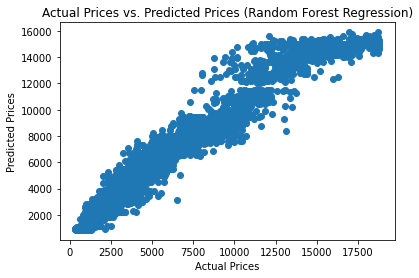

In [50]:
# Visualize predictions against actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Random Forest Regression)')
plt.show()

# Examinamos train

In [14]:
data = pd.read_csv("../data/diamonds_test.csv")

In [15]:
data = data[['carat',
             'cut', 
             'color', 
             'clarity', 
             'depth', 
             'table', 
             'x', 
             'y', 
             'z']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [16]:
data["size"] = data["x"] * data["y"] * data["z"]
data

,carat,cut,color,clarity,depth,table,x,y,z,size
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,125.806866
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,196.129362
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,246.878712
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,145.593630
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,81.997355
...,...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,93.924600
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,116.477148
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,115.898725
13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,118.874925


In [17]:
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'size']]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   size     13485 non-null  float64
dtypes: float64(4), object(3)
memory usage: 737.6+ KB


In [18]:
cut_new = {
    "Fair" : 10,
    "Good" : 20,
    "Very Good" : 30,
    "Premium" : 40,
    "Ideal" : 50,
}
data['cut'].replace(cut_new,inplace=True)

color_new = {
    "D" : 700,
    "E" : 600,
    "F" : 500,
    "G" : 400,
    "H" : 300,
    "I" : 200,
    "J" : 100,
}
data['color'].replace(color_new,inplace=True)

new_clarity = { "I1" : 1000,
    "SI2" : 2000,
    "SI1" : 3000,
    "VS2" : 4000,
    "VS1" : 5000,
    "VVS2" : 6000,
    "VVS1" : 7000,
    "IF" : 8000,}
data['clarity'].replace(new_clarity,inplace=True)

/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_87718/2230060658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'].replace(cut_new,inplace=True)
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_87718/2230060658.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'].replace(color_new,inplace=True)
/var/folders/1m/9tdt_k994v175ff72qvvlr7r0000gn/T/ipykernel_87718/2230060658.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [19]:
data

,carat,cut,color,clarity,depth,table,size
0,0.79,30,500,3000,62.7,60.0,125.806866
1,1.20,50,100,5000,61.0,57.0,196.129362
2,1.57,40,300,3000,62.2,61.0,246.878712
3,0.90,30,500,3000,63.8,54.0,145.593630
4,0.50,30,500,5000,62.9,58.0,81.997355
...,...,...,...,...,...,...,...
13480,0.57,50,600,3000,61.9,56.0,93.924600
13481,0.71,50,200,4000,62.2,55.0,116.477148
13482,0.70,50,500,5000,61.6,55.0,115.898725
13483,0.70,30,500,2000,58.8,57.0,118.874925


In [20]:
predictions = random_forest_model.predict(data)

In [21]:
predictions = pd.DataFrame(predictions, columns=['price'])

In [22]:
predictions['id'] = range(0, len(predictions))
predictions

,price,id
0,2924.120000,0
1,5558.421667,1
2,9265.700000,2
3,3989.990000,3
4,1703.574667,4
...,...,...
13480,1718.490000,13480
13481,2432.890000,13481
13482,3102.040000,13482
13483,2153.540000,13483


In [23]:
predictions = predictions[['id', 'price']]
predictions

,id,price
0,0,2924.120000
1,1,5558.421667
2,2,9265.700000
3,3,3989.990000
4,4,1703.574667
...,...,...
13480,13480,1718.490000
13481,13481,2432.890000
13482,13482,3102.040000
13483,13483,2153.540000


In [25]:
predictions.to_csv('../data/submission/submission_RFR_MSR_286878.csv', index = False)